In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [4]:
# Display the first few rows of the train dataset
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Summary statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check for missing values
train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

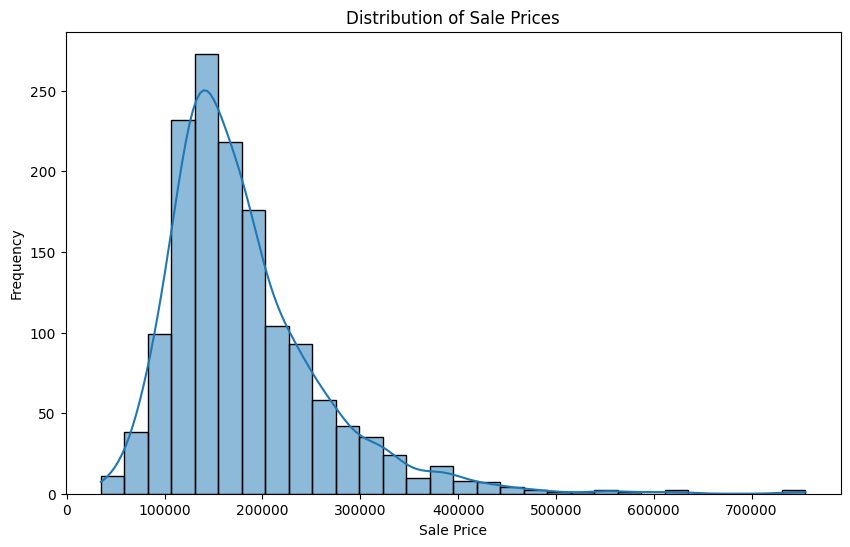

In [7]:
# Plot the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

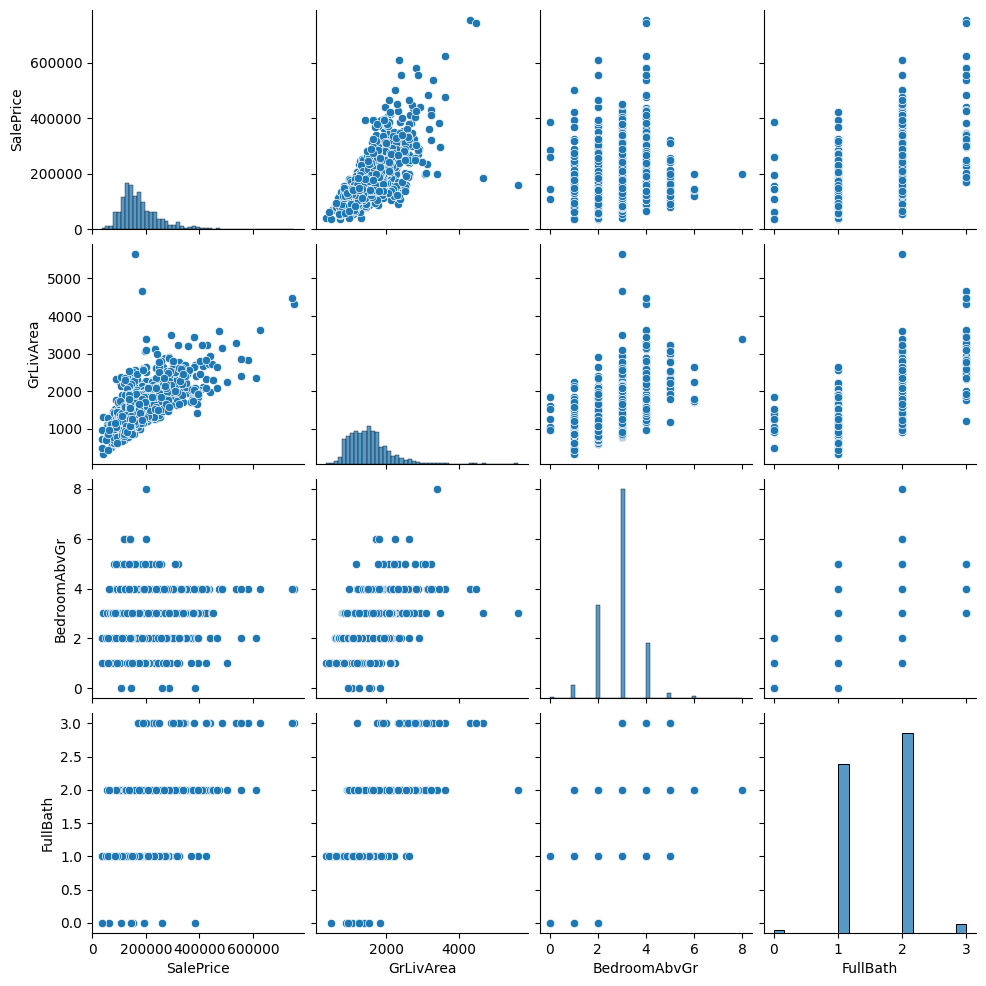

In [8]:
# Plot the relationship between features and target variable
sns.pairplot(train[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']])
plt.show()

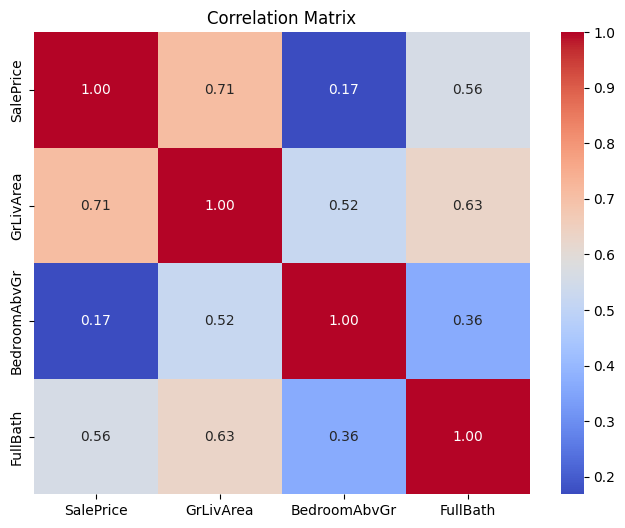

In [9]:
# Correlation matrix
correlation_matrix = train[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

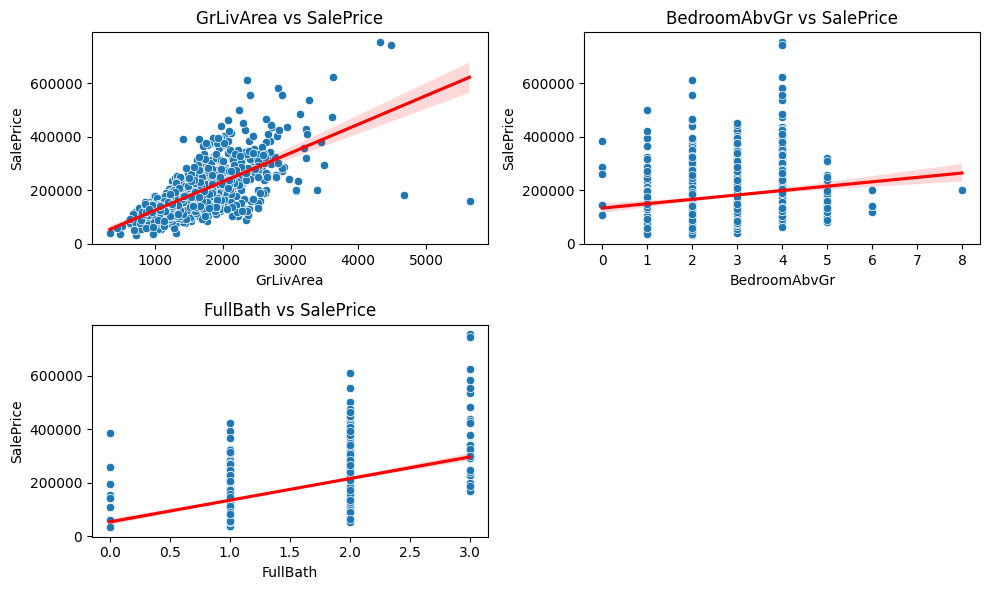

In [10]:
# Scatter plots with regression lines
plt.figure(figsize=(10, 6))

# GrLivArea vs SalePrice
plt.subplot(2, 2, 1)
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], scatter=False, color='r')
plt.title('GrLivArea vs SalePrice')

# BedroomAbvGr vs SalePrice
plt.subplot(2, 2, 2)
sns.scatterplot(x=train['BedroomAbvGr'], y=train['SalePrice'])
sns.regplot(x=train['BedroomAbvGr'], y=train['SalePrice'], scatter=False, color='r')
plt.title('BedroomAbvGr vs SalePrice')

# FullBath vs SalePrice
plt.subplot(2, 2, 3)
sns.scatterplot(x=train['FullBath'], y=train['SalePrice'])
sns.regplot(x=train['FullBath'], y=train['SalePrice'], scatter=False, color='r')
plt.title('FullBath vs SalePrice')

plt.tight_layout()
plt.show()


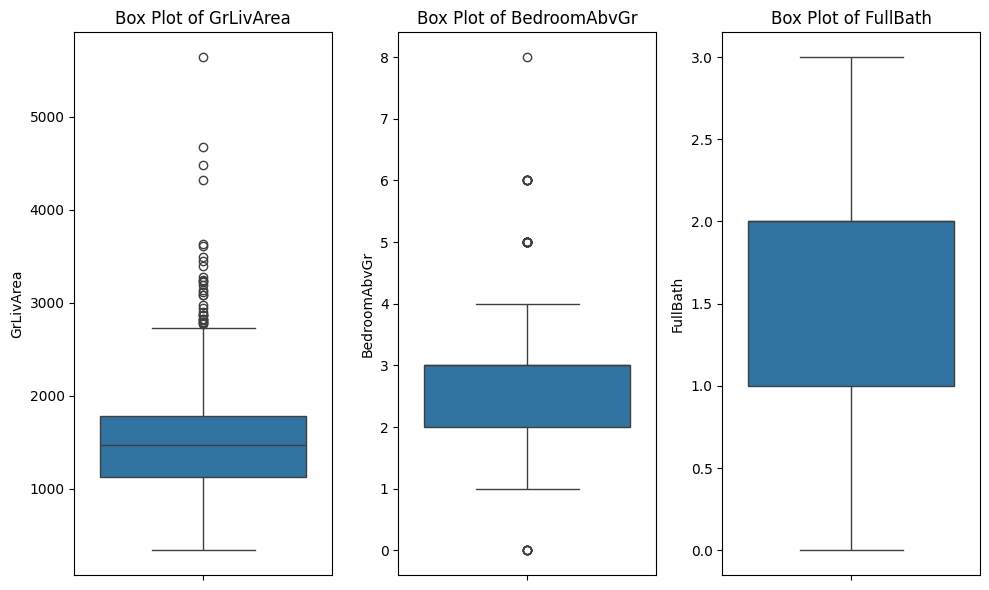

In [11]:
# Box plots to check for outliers
plt.figure(figsize=(10, 6))

# GrLivArea
plt.subplot(1, 3, 1)
sns.boxplot(y=train['GrLivArea'])
plt.title('Box Plot of GrLivArea')

# BedroomAbvGr
plt.subplot(1, 3, 2)
sns.boxplot(y=train['BedroomAbvGr'])
plt.title('Box Plot of BedroomAbvGr')

# FullBath
plt.subplot(1, 3, 3)
sns.boxplot(y=train['FullBath'])
plt.title('Box Plot of FullBath')

plt.tight_layout()
plt.show()


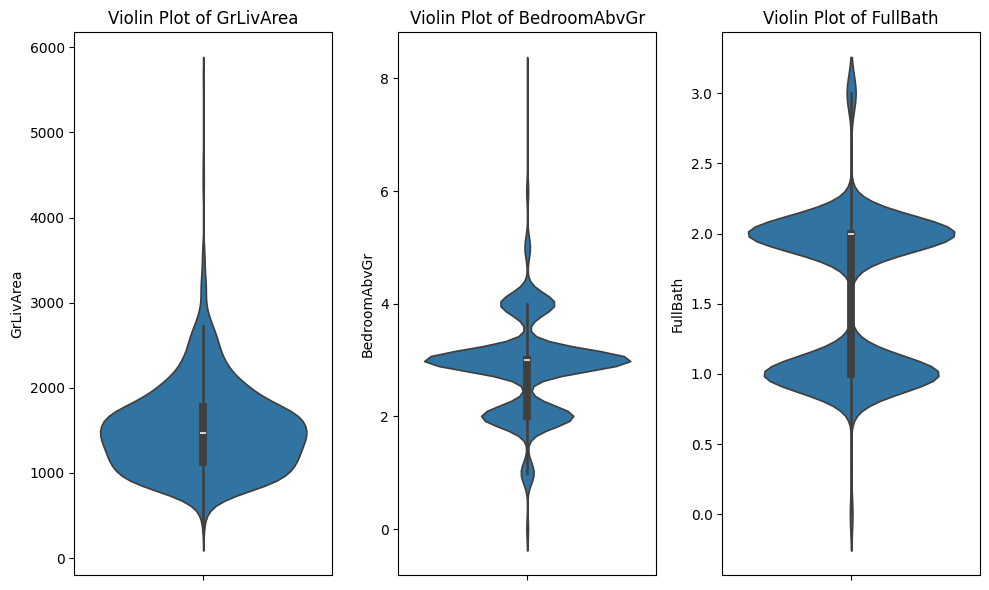

In [12]:
# Violin plots to visualize distribution and density
plt.figure(figsize=(10, 6))

# GrLivArea
plt.subplot(1, 3, 1)
sns.violinplot(y=train['GrLivArea'])
plt.title('Violin Plot of GrLivArea')

# BedroomAbvGr
plt.subplot(1, 3, 2)
sns.violinplot(y=train['BedroomAbvGr'])
plt.title('Violin Plot of BedroomAbvGr')

# FullBath
plt.subplot(1, 3, 3)
sns.violinplot(y=train['FullBath'])
plt.title('Violin Plot of FullBath')

plt.tight_layout()
plt.show()


In [13]:
# Select features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = train[features]
y = train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Display the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.748626944594


In [15]:
# Make predictions
y_pred = model.predict(X_test)


In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122
R^2 Score: 0.6341189942328371


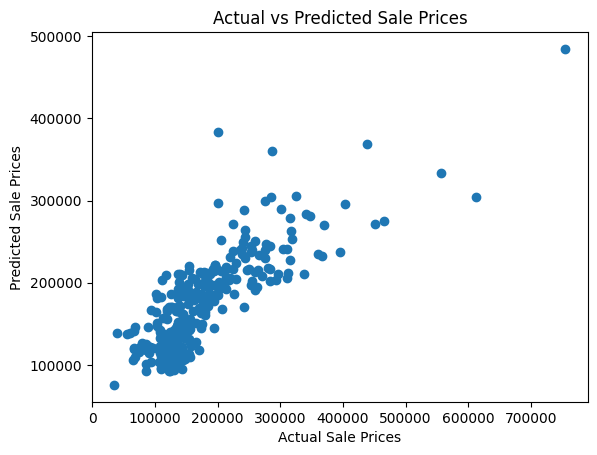

In [17]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In [18]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122
R^2 Score: 0.6341189942328371


In [19]:
# Make predictions on the actual test dataset
X_submission = test[features]
submission_predictions = model.predict(X_submission)

# Create the submission dataframe
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': submission_predictions})

# Save the submission file
submission.to_csv('output/submission.csv', index=False)

print(submission.head())

     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106
